In [219]:
import networkx as nx
from networkx.algorithms import node_classification

def create_toy_network():
    
    G = nx.MultiGraph()
    edges = [('A','B'), ('B','A'), 
             ('X','A'), ('A','X'),
             ('X','Y'), ('C','X'), 
             ('C','Y'), ('C','Z'),
             ('D','Y'), ('O','P'),
             ('P','Q')]
    
    G.add_edges_from(edges)

    G.nodes['A']['label'] = 'RED'
    G.nodes['C']['label'] = 'BLUE'
    G.nodes['D']['label'] = 'RED'
    G.nodes['O']['label'] = 'BLUE'
    G.nodes['O']['label'] = 'RED'
    
    return G

In [293]:
import networkx as nx
from networkx.algorithms import node_classification

def create_toy_network():
    
    G = nx.MultiGraph()

    edges = [('A','B'),
             ('B','C'), ('C','B'),
             ('B','D'), ('D','C'),
             ('O','P'),('P','Q')]
    
    G.add_edges_from(edges)

    G.nodes['A']['label'] = 'RED'
    G.nodes['C']['label'] = 'BLUE'
    G.nodes['P']['label'] = 'GREEN'
    
    return G

In [300]:
def create_toy_network():
    
    G = nx.MultiGraph()

    edges = [('A','B'),
             ('B','C'), ('C','B'),
             ('B','D'), ('D','C'),
             ('O','P'),('P','Q')]
    
    G.add_edges_from(edges)

    G.nodes['A']['label'] = 'RED'
    G.nodes['C']['label'] = 'BLUE'
    G.nodes['P']['label'] = 'GREEN'
    
    return G

In [356]:
def create_toy_network():
    
    G = nx.MultiGraph()
    
    edges = ('A','B',{'weight'=0.5})
            ('A','C',{'weight'=0.2})
    ('C','A',{'weight'=0.2})

    

    G.nodes['B']['label'] = 'RED'
    G.nodes['C']['label'] = 'BLUE'
    
    return G

In [357]:
G = create_toy_network()

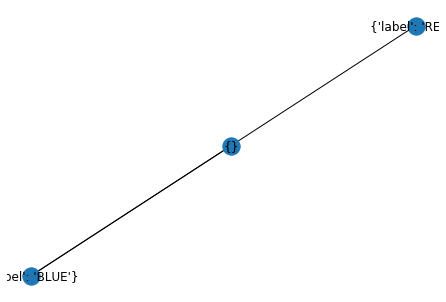

In [358]:
G = create_toy_network() 
nx.draw(G,labels=G.nodes(), with_labels = True)


In [359]:
nx.nx_pydot.write_dot(G,'multi_new1.dot')
!neato -T png multi_new1.dot > multi_new1.png

In [360]:
print(G.nodes())

['A', 'B', 'C']


In [361]:
node_classification.harmonic_function(G)

['RED', 'RED', 'BLUE']

In [362]:
node_classification.local_and_global_consistency(G)

['RED', 'RED', 'BLUE']

In [262]:
# for node_id, pred in zip(G.nodes(),predictions):
#     G.nodes[node_id]['label'] = pred

In [263]:
G.nodes()

NodeView(('A', 'B', 'C', 'D'))

## Evaluation

In [251]:
from scipy import sparse
import numpy as np

In [ ]:
def _build_propagation_matrix(X, labels):
    """Build propagation matrix of Harmonic function

    Parameters
    ----------
    X : scipy sparse matrix, shape = [n_samples, n_samples]
        Adjacency matrix
    labels : array, shape = [n_samples, 2]
        Array of pairs of node id and label id

    Returns
    ----------
    P : scipy sparse matrix, shape = [n_samples, n_samples]
        Propagation matrix

    """
    degrees = X.sum(axis=0).A[0]
    degrees[degrees == 0] = 1  # Avoid division by 0
    D = sparse.diags((1.0 / degrees), offsets=0)
    P = D.dot(X).tolil()
    P[labels[:, 0]] = 0  # labels[:, 0] indicates IDs of labeled nodes
    return P

    def _build_base_matrix(X, labels, n_classes):
    """Build base matrix of Harmonic function

    Parameters
    ----------
    X : scipy sparse matrix, shape = [n_samples, n_samples]
        Adjacency matrix
    labels : array, shape = [n_samples, 2]
        Array of pairs of node id and label id
    n_classes : integer
        The number of classes (distinct labels) on the input graph

    Returns
    ----------
    B : array, shape = [n_samples, n_classes]
        Base matrix
    """
    n_samples = X.shape[0]
    B = np.zeros((n_samples, n_classes))
    B[labels[:, 0], labels[:, 1]] = 1
    return B

X = nx.to_scipy_sparse_matrix(G)  # adjacency matrix
labels, label_dict = _get_label_info(G, label_name)

if labels.shape[0] == 0:
    raise nx.NetworkXError(
        "No node on the input graph is labeled by '" + label_name + "'.")

n_samples = X.shape[0]
n_classes = label_dict.shape[0]

F = _init_label_matrix(n_samples, n_classes)

P = _build_propagation_matrix(X, labels)
B = _build_base_matrix(X, labels, n_classes)

remaining_iter = max_iter
while remaining_iter > 0:
    F = _propagate(P, F, B)
    remaining_iter -= 1

predicted = _predict(F, label_dict)

return predicted

In [253]:
def _build_propagation_matrix(X, labels):
    
    """Build propagation matrix of Harmonic function

    Parameters
    ----------
    X : scipy sparse matrix, shape = [n_samples, n_samples]
        Adjacency matrix
    labels : array, shape = [n_samples, 2]
        Array of pairs of node id and label id

    Returns
    ----------
    P : scipy sparse matrix, shape = [n_samples, n_samples]
        Propagation matrix

    """
    
    degrees = X.sum(axis=0).A[0]
    degrees[degrees == 0] = 1  # Avoid division by 0
    D = sparse.diags((1.0 / degrees), offsets=0)
    P = D.dot(X).tolil()
    P[labels[:, 0]] = 0  # labels[:, 0] indicates IDs of labeled nodes
    return P

def _build_base_matrix(X, labels, n_classes):
    
    """Build base matrix of Harmonic function

    Parameters
    ----------
    X : scipy sparse matrix, shape = [n_samples, n_samples]
        Adjacency matrix
    labels : array, shape = [n_samples, 2]
        Array of pairs of node id and label id
    n_classes : integer
        The number of classes (distinct labels) on the input graph

    Returns
    ----------
    B : array, shape = [n_samples, n_classes]
        Base matrix
    """
    
    n_samples = X.shape[0]
    B = np.zeros((n_samples, n_classes))
    B[labels[:, 0], labels[:, 1]] = 1

    return B

In [279]:
sparse.diags((1.0 / degrees), offsets=0).toarray()

array([[0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 0.5       ]])

In [277]:
degrees = X.sum(axis=0).A[0]
degrees[degrees == 0]

array([], dtype=int64)

In [265]:
from networkx.utils.decorators import not_implemented_for
from networkx.algorithms.node_classification.utils import (
    _get_label_info,
    _init_label_matrix,
    _propagate,
    _predict,
)

__all__ = ['harmonic_function']

In [363]:
X = nx.to_scipy_sparse_matrix(G)
X.shape[0]

3

In [364]:
X.toarray()

array([[0. , 0.5, 0.4],
       [0.5, 0. , 0. ],
       [0.4, 0. , 0. ]])

In [ ]:
import networkx as nx
from networkx.algorithms import node_classification

def create_toy_network():
    
    G = nx.MultiGraph()

    edges = [('A','B'), ('B','A'),
             ('B','C'), ('C','B'),
             ('B','D'), ('D','C')]
    
    G.add_edges_from(edges)

    G.nodes['A']['label'] = 'RED'
    G.nodes['C']['label'] = 'BLUE'
    
    return G

In [ ]:
X = nx.to_scipy_sparse_matrix(G)  # adjacency matrix
labels, label_dict = _get_label_info(G, label_name)

if labels.shape[0] == 0:
    raise nx.NetworkXError(
        "No node on the input graph is labeled by '" + label_name + "'.")

n_samples = X.shape[0]
n_classes = label_dict.shape[0]

F = _init_label_matrix(n_samples, n_classes)

P = _build_propagation_matrix(X, labels)
B = _build_base_matrix(X, labels, n_classes)

remaining_iter = max_iter
while remaining_iter > 0:
    F = _propagate(P, F, B)
    remaining_iter -= 1

predicted = _predict(F, label_dict)

return predicted